In [52]:
import pandas as pd
from fbprophet import Prophet
from matplotlib import pyplot
from statsmodels.tsa.stattools import grangercausalitytests

In [10]:
df = pd.read_csv("..\..\Data_set\Chispazo.csv", sep = ",", encoding = "utf8")

In [11]:
df.shape

(7999, 7)

In [12]:
df.head()

,CONCURSO,FECHA,R1,R2,R3,R4,R5
0,1,05/01/1999 00:00,4,7,11,21,24
1,2,08/01/1999 00:00,5,12,18,22,23
2,3,12/01/1999 00:00,1,12,16,18,21
3,4,19/01/1999 00:00,6,10,16,20,25
4,5,19/01/1999 00:00,12,14,17,21,24


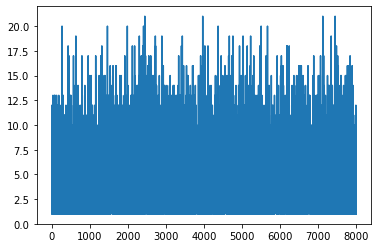

In [17]:
df['R1'].plot()
pyplot.show()

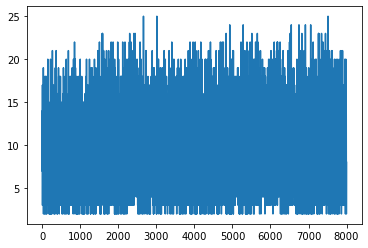

In [18]:
df['R2'].plot()
pyplot.show()

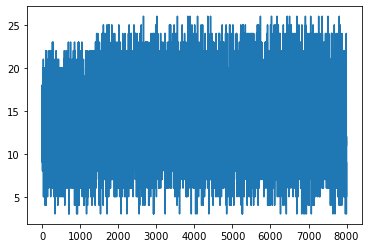

In [19]:
df['R3'].plot()
pyplot.show()

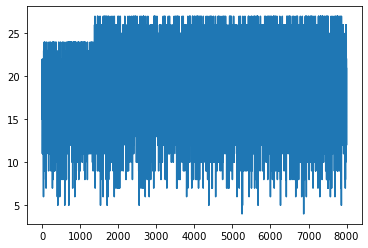

In [20]:
df['R4'].plot()
pyplot.show()

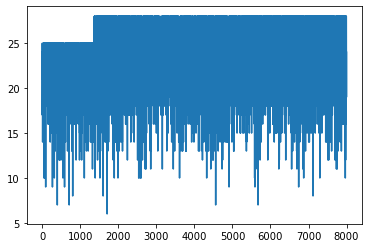

In [21]:
df['R5'].plot()
pyplot.show()

In [24]:
model = Prophet()

In [26]:
df_r1 = df[['FECHA', 'R1']]

In [28]:
df_r1.columns = ['ds', 'y']

In [31]:
df_r1['ds'] = pd.to_datetime(df_r1['ds'])

<ipython-input-31-752e9034dd20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r1['ds'] = pd.to_datetime(df_r1['ds'])


In [32]:
df_r1

,ds,y
0,1999-05-01,4
1,1999-08-01,5
2,1999-12-01,1
3,1999-01-19,6
4,1999-01-19,12
...,...,...
7994,2020-11-16,1
7995,2020-11-16,1
7996,2020-11-17,1
7997,2020-11-17,3


In [45]:
model = Prophet(daily_seasonality=True)

In [46]:
model.fit(df_r1)

In [55]:
granger_test = grangercausalitytests(df[['R1', 'R2', 'R3', 'R4', 'R5']], maxlag=5, verbose=True)
granger_test


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.3966  , p=0.0038  , df_denom=7992, df_num=1
ssr based chi2 test:   chi2=8.4029  , p=0.0037  , df=1
likelihood ratio test: chi2=8.3985  , p=0.0038  , df=1


ValueError: wrong shape for coefs